# Set-Up

## Installations and Imports

In [36]:
# !pip uninstall tetridiv --yes
# !pip install ..

Found existing installation: tetridiv 0.0.0
Uninstalling tetridiv-0.0.0:
  Successfully uninstalled tetridiv-0.0.0
Processing /root/shared
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tetridiv: filename=tetridiv-0.0.0-py3-none-any.whl size=7036 sha256=e3a58a436db0d0285888f752add74a9ed387f178aac6c5dd3873bd65b3feef09
  Stored in directory: /tmp/pip-ephem-wheel-cache-fcms3sls/wheels/8f/7d/50/5ad8920b2b5372a158050084f2391ebd3595733554d4647d06
Successfully built tetridiv


In [2]:
# To run this notebook, first install gmsh by running the following terminal command:
# sudo apt install python3-gmsh
# Next, install the following using pip:
# !pip install pygmsh meshio pyvista vtk numpyencoder

In [1]:
import pygmsh
import meshio
import os
import json
import tetridiv
import numpy as np
from numpyencoder import NumpyEncoder
from visualisation_helpers import plot_mesh, create_pyvista_grid

## Display Options

In [2]:
show_args = {}
# For interactive plots, uncomment the following line:
show_args = {'jupyter_backend': 'panel', 'return_viewer': True}

## Save Options

In [3]:
save_tests = False

In [4]:
def save_test_case(test_dict, save_name, indent=4):
    if save_name[-5:] != '.json':
        save_name += '.json'
    with open(save_name, 'w') as f:
        json.dump(test_dict, f, indent=indent, cls=NumpyEncoder)

# Single Elements

## Single Triangle

In [7]:
one_tri = {'points': np.array([[0., 0.], [1., 0.], [0., 1.]]),
           'cells': np.array([[0, 1, 2]]), 
           'cell_geom': 'triangle'}
one_tri_div = tetridiv.tri2quad(points=one_tri['points'], cells=one_tri['cells'])
one_tri_div['cell_geom'] = 'quad'
one_tri_test = {'input': one_tri, 'output': one_tri_div}
if save_tests:
    save_test_case(one_tri_test, save_dolfinx, 'one_tri')

/usr/local/lib/python3.9/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


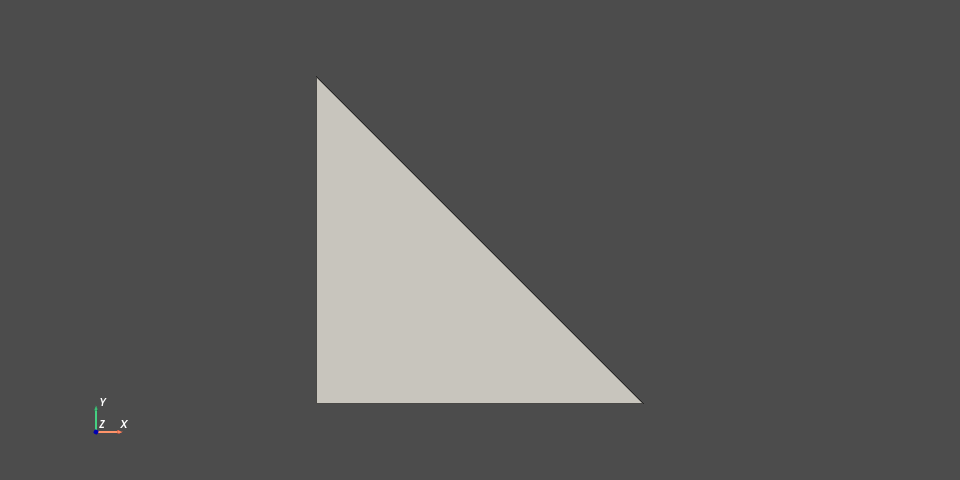

In [8]:
p = plot_mesh(one_tri)
p.show(**show_args)

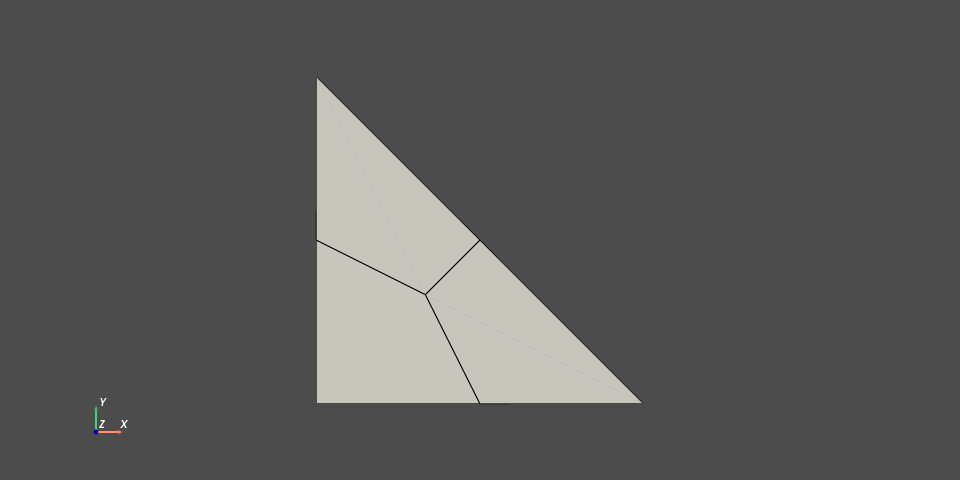

In [9]:
p = plot_mesh(one_tri_div)
p.show(**show_args)

## Single Tetrahedron

In [10]:
one_tet = {'points': np.array([[0., 0., 0.], [1., 0., 0.], [0., 1., 0.], [0., 0., 1.]]),
           'cells': np.array([[0, 1, 2, 3]]),
           'cell_geom': 'tetra'}
one_tet_div = tetridiv.tet2hex(points=one_tet['points'], cells=one_tet['cells'])
one_tet_div['cell_geom'] = 'hexahedron'
one_tet_test = {'input': one_tet, 'output': one_tet_div}
if save_tests:
    save_test_case(one_tet_test, 'one_tet')

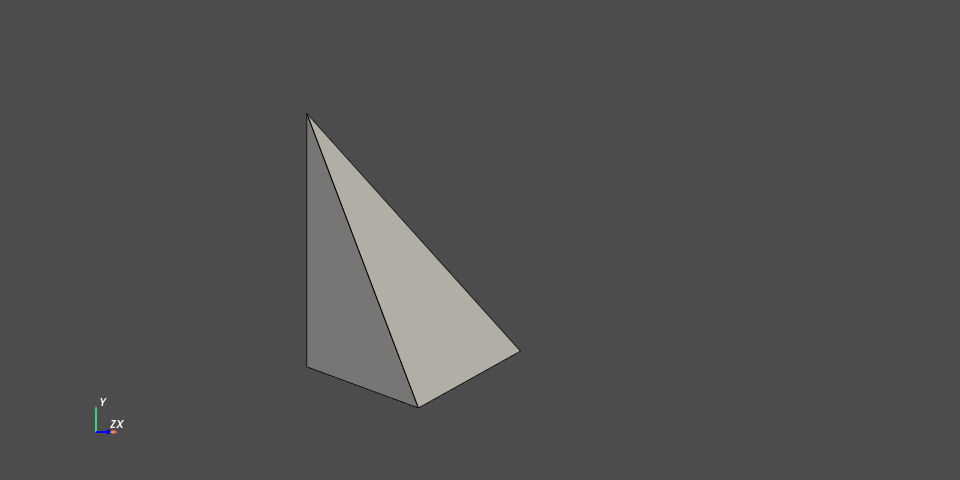

In [11]:
p = plot_mesh(one_tet)
p.camera.azimuth -= 30
p.show(**show_args)

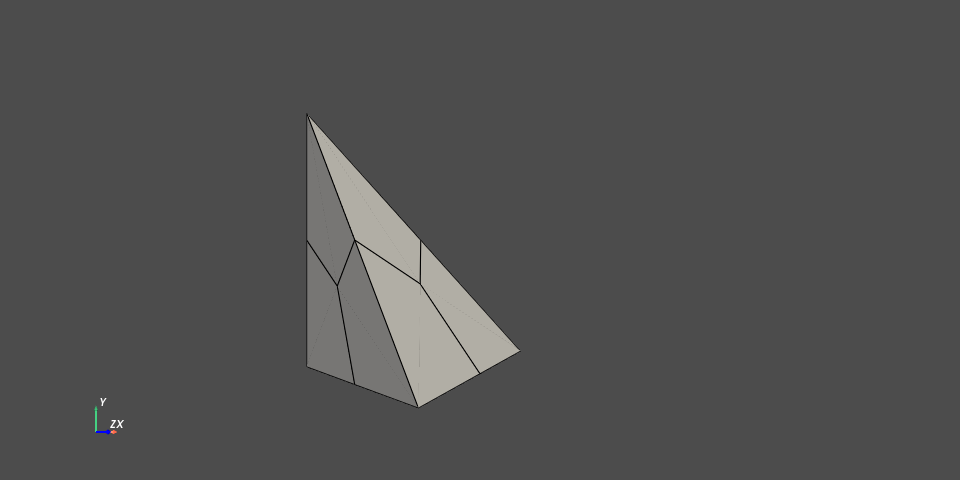

In [12]:
p = plot_mesh(one_tet_div)
p.camera.azimuth -= 30
p.show(**show_args)

# Two Elements

## Two Triangles

In [13]:
two_tri = {'points': np.array([[0., 0.], [1., 0.], [0., 1.], [1.,1.]]),
           'cells': np.array([[0, 1, 2], [1, 2, 3]]), 
           'cell_geom': 'triangle'}
two_tri_div = tetridiv.tri2quad(points=two_tri['points'], cells=two_tri['cells'])
two_tri_div['cell_geom'] = 'quad'
two_tri_test = {'input': two_tri, 'output': two_tri_div}
if save_tests:
    save_test_case(two_tri_test, 'two_tri')

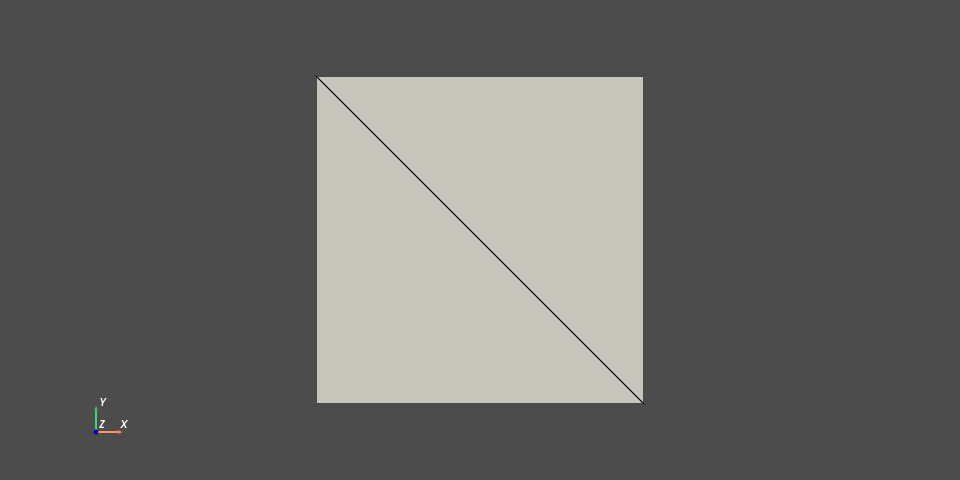

In [14]:
p = plot_mesh(two_tri)
p.show(**show_args)

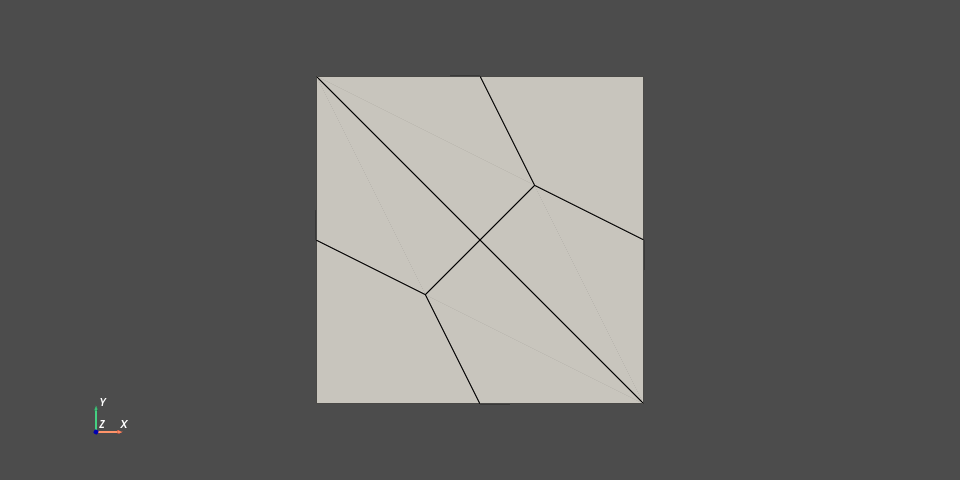

In [15]:
p = plot_mesh(two_tri_div)
p.show(**show_args)

## Two Tetrahedrons

In [16]:
two_tet = {'points': np.array([[0., 0., 0.], [1., 0., 0.], [0., 1., 0.], [0., 0., 1.], [0., 0., -1.]]),
           'cells': np.array([[0, 1, 2, 3], [0, 1, 2, 4]]), 
           'cell_geom': 'tetra'}
two_tet_div = tetridiv.tet2hex(points=two_tet['points'], cells=two_tet['cells'])
two_tet_div['cell_geom'] = 'hexahedron'
two_tet_test = {'input': two_tet, 'output': two_tet_div}
if save_tests:
    save_test_case(two_tet_test, 'two_tet')

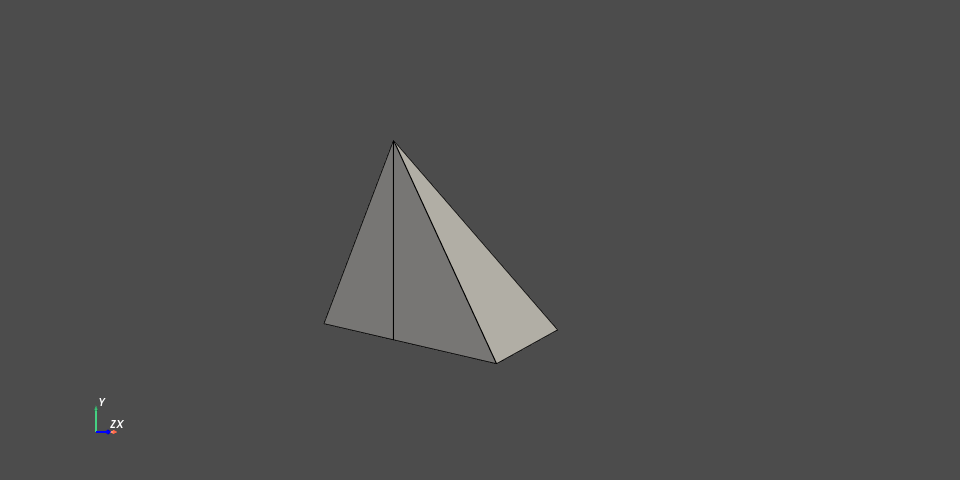

In [17]:
p = plot_mesh(two_tet)
p.camera.azimuth -= 30
p.show(**show_args)

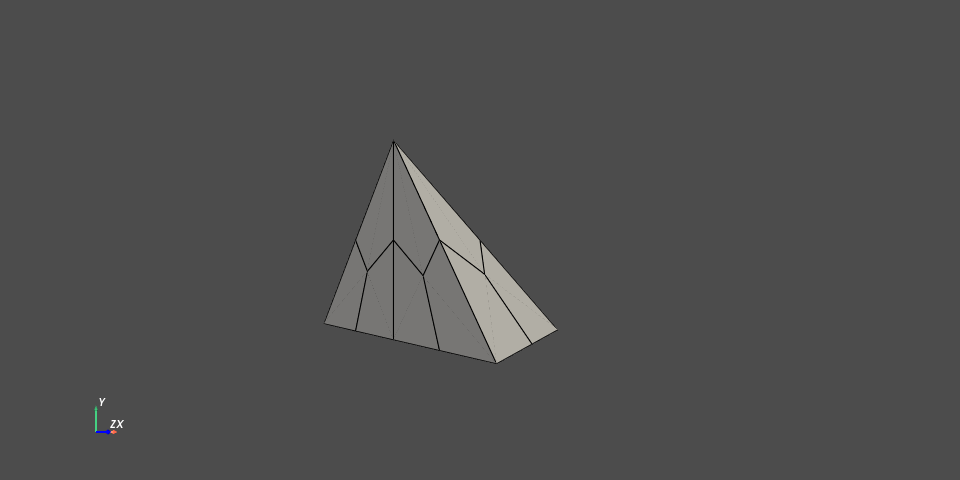

In [18]:
p = plot_mesh(two_tet_div)
p.camera.azimuth -= 30
p.show(**show_args)

# 2d Circular Surface

In [7]:
centre = [0.0, 0.0, 0.0]
radius = 1.0
mesh_size = 0.1
with pygmsh.geo.Geometry() as geom:
    geom.add_circle(centre, radius, mesh_size, num_sections = 4)
    pygmsh_mesh = geom.generate_mesh(dim=2)
    pygmsh.write('circle.msh')
circle = meshio.read("circle.msh")
os.remove("circle.msh")
circle_div = tetridiv.tri2quad(circle)
circle_test = {'input': {'points': circle.points[:,:-1], 
                         'cells': circle.cells_dict['triangle'], 
                         'cell_geom': 'triangle'}, 
               'output': {'points': circle_div.points[:,:-1], 
                          'cells': circle_div.cells_dict['quad'], 
                          'cell_geom': 'quad'}}
if save_tests:
    save_test_case(circle_test, 'circle')

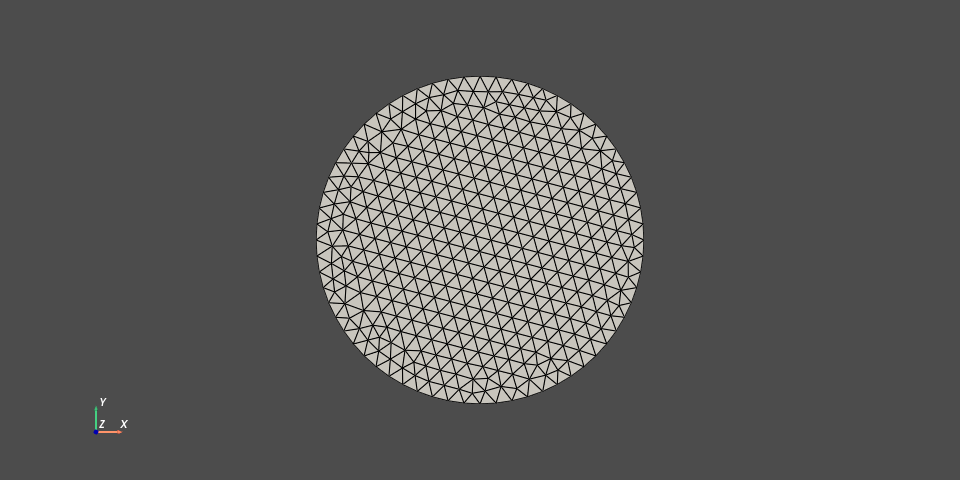

In [20]:
p = plot_mesh(circle)
p.show(**show_args)

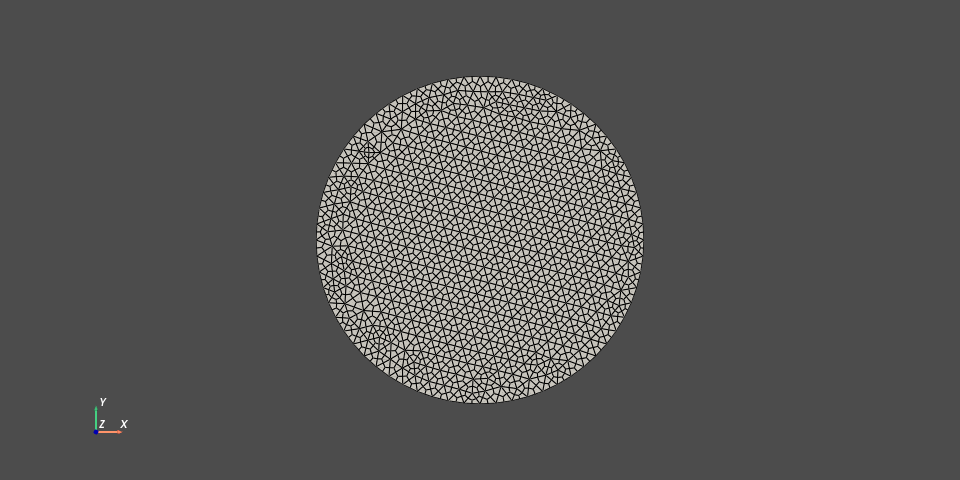

In [21]:
p = plot_mesh(circle_div)
p.show(**show_args)

# 3d Ellipsoidal Surface

In [55]:
centre = [0.0, 0.0, 0.0]
radii = [10.0, 15, 20]
mesh_size = 20
with pygmsh.geo.Geometry() as geom:
    geom.add_ellipsoid(centre, radii, mesh_size, with_volume=False)
    pygmsh_mesh = geom.generate_mesh(dim=2)
    pygmsh.write('ellipsoid.msh')
ellipsoid_surf = meshio.read("ellipsoid.msh")
os.remove("ellipsoid.msh")
ellipsoid_surf_div = tetridiv.tri2quad(ellipsoid_surf)
ellipsoid_surf_test = {'input': {'points': ellipsoid_surf.points, 
                                 'cells': ellipsoid_surf.cells_dict['triangle'], 
                                 'cell_geom':'triangle'}, 
                       'output': {'points': ellipsoid_surf_div.points, 
                                  'cells': ellipsoid_surf_div.cells_dict['quad'], 
                                  'cell_geom': 'quad'}}
if save_tests:
    save_test_case(ellipsoid_surf_test, 'ellipsurf')

In [42]:
p = plot_mesh(tetridiv.tri2quad(ellipsoid_surf, output_type='meshio'), slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

VTKRenderWindowSynchronized(vtkXOpenGLRenderWindow, height=480, orientation_widget=True, sizing_mode='stretch_width', width=960)

In [21]:
p = plot_mesh(tetridiv.tri2quad(ellipsoid_surf, output_type='dolfinx'), slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

VTKRenderWindowSynchronized(vtkXOpenGLRenderWindow, height=480, orientation_widget=True, sizing_mode='stretch_width', width=960)


Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(



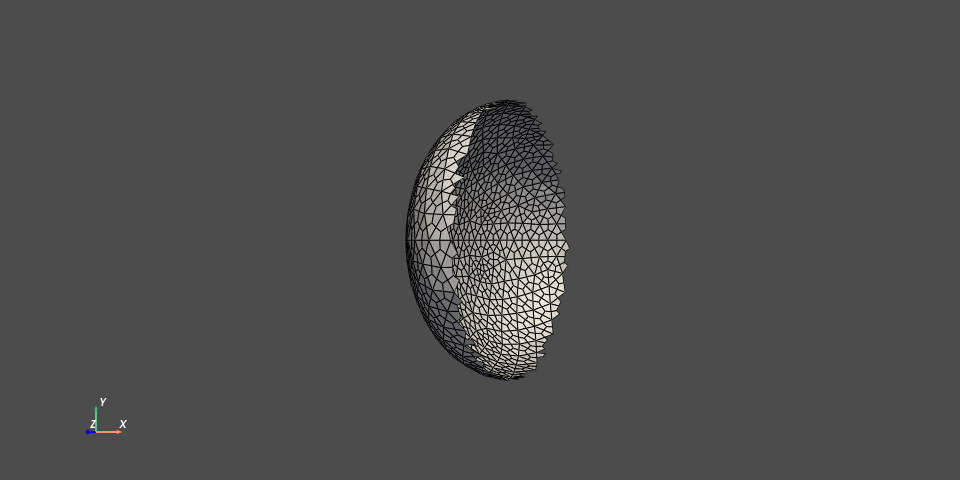

In [ ]:
p = plot_mesh(ellipsoid_surf, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

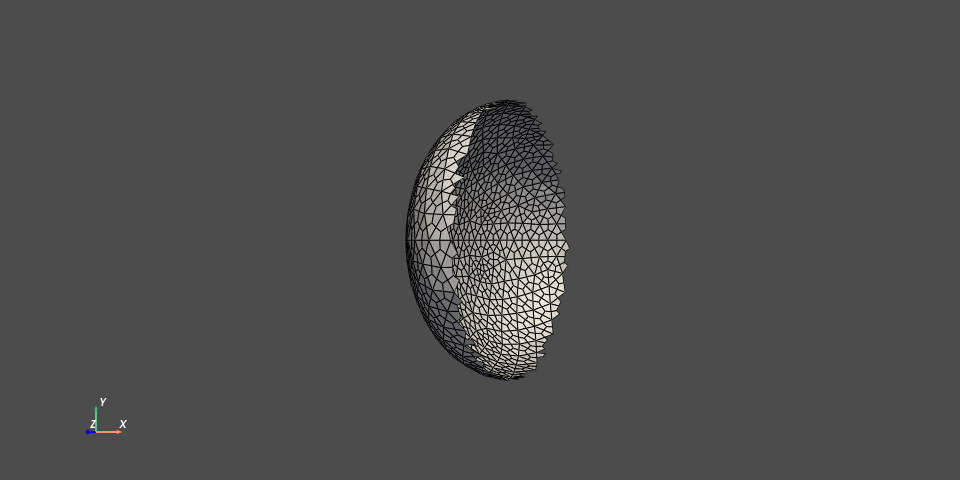

In [24]:
p = plot_mesh(ellipsoid_surf_div, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

# 3d Volume Tests

In [25]:
centre = [0.0, 0.0, 0.0]
radii = [1.0, 1.5, 2.0]
mesh_size = 0.5
with pygmsh.geo.Geometry() as geom:
    geom.add_ellipsoid(centre, radii, mesh_size, with_volume=True)
    pygmsh_mesh = geom.generate_mesh(dim=3)
    pygmsh.write('ellipsoid.msh')
ellipsoid_vol = meshio.read("ellipsoid.msh")
os.remove("ellipsoid.msh")
ellipsoid_vol_div = tetridiv.tet2hex(ellipsoid_vol)
ellipsoid_vol_test = {'input': {'points': ellipsoid_vol.points, 
                                'cells': ellipsoid_vol.cells_dict['tetra'], 
                                'cell_geom':'tetra'}, 
                      'output': {'points': ellipsoid_vol_div.points, 
                                 'cells': ellipsoid_vol_div.cells_dict['hexahedron'], 
                                 'cell_geom':'hexahedron'}}
if save_tests:
    save_test_case(ellipsoid_vol_test, 'ellipvol')

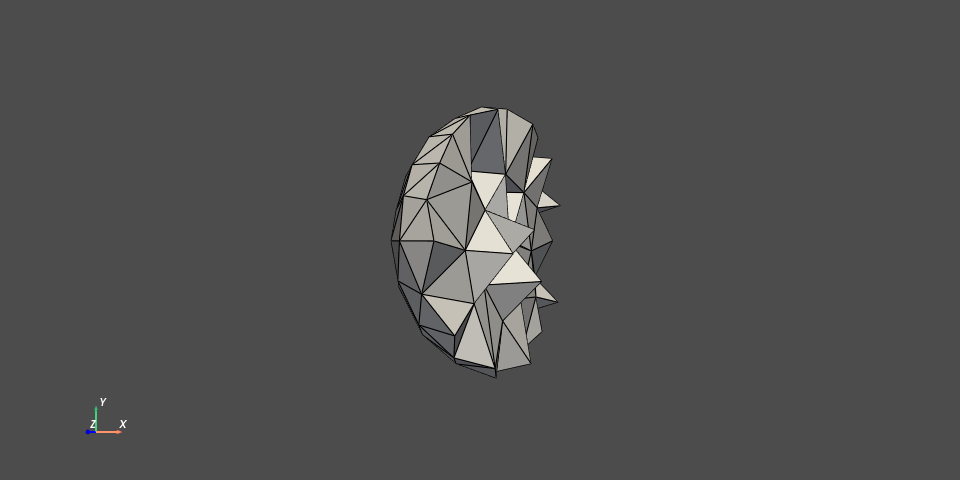

In [26]:
p = plot_mesh(ellipsoid_vol, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)

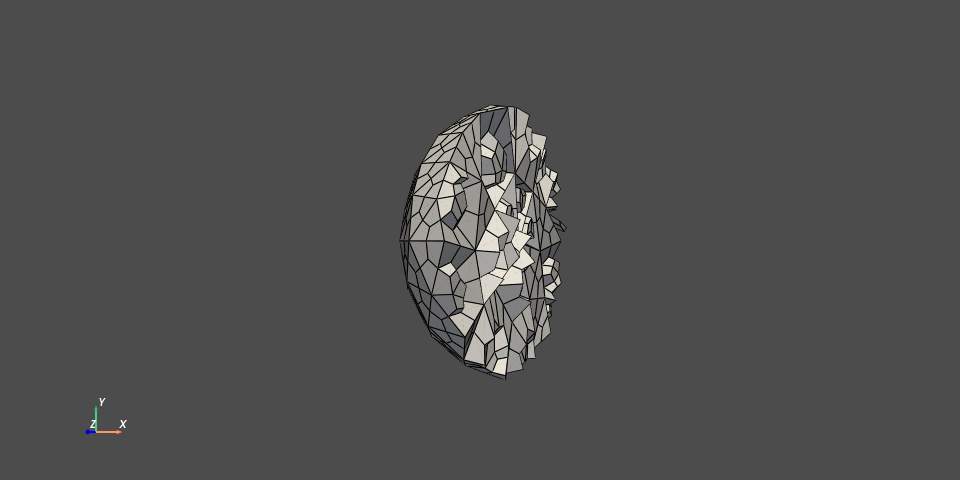

In [27]:
p = plot_mesh(ellipsoid_vol_div, slice_mesh=True)
p.camera.azimuth += 20
p.show(**show_args)